## **Prerequisites**

### Step 1: **Setup Azure Machine Learning Workspace via the portal.**
Note the workspace nane, resource group id, and subscription id and add to your .env file

### Step 2: **Setup Local Dev Environment**

#### A. Via the terminal, _from this repo's home directory_, run the following commands

```bash
conda env create --name nlg_eval --file=./environment/conda.yaml
conda activate nlg_eval
```

If you are not using VS Code you may need to run the following command to install the kernel

```bash
python -m ipykernel install --user --name nlg_eval --display-name "nlg_eval"
```

#### B. Download and install [PromptFlow for VS code](https://marketplace.visualstudio.com/items?itemName=prompt-flow.prompt-flow)

### Step 3: **Create Azure Open AI Connection**
This connection will be used to access chat, completion and embedding models for both sample chat flows and flow evaluations

#### A. Create Open AI Service via Azure Portal
- Create model deployments
  - For some labs only a _chat_ model is required. For others you will need an _embedding_ model as well
  - For parity sake, use gpt-3.5t for chat outputs and gpt-4 for evaluation of gpt based metrics
  - _Note: Source code may need to be updated to reflect deployment and model names_ 
  
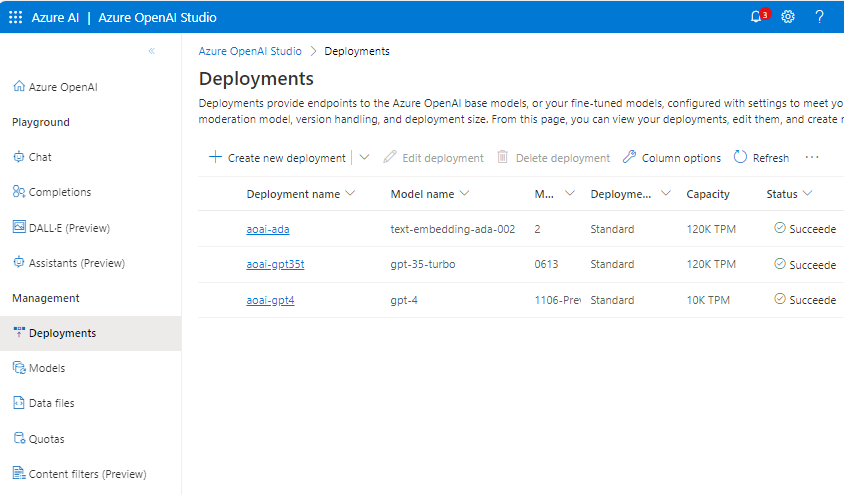
  
- Note the OpenAI resource variables and add to your .env file

### Step 4: **Create and populate a .env file in the home directory of this repository.** 
Use this [.sample.env file](../.sample.env) as a guide. 

In [ ]:
# Load environment variables from .env file
import os
from dotenv import load_dotenv, find_dotenv

load_dotenv(find_dotenv(), override=True)
print(os.getenv("WORKSPACE_NAME"))
print(os.getenv("AZURE_OPENAI_ENDPOINT"))

### Step 5: **Create AOAI/LLM connections to be used in PromptFlow**

In [ ]:
import subprocess

api_key = os.getenv("AZURE_OPENAI_KEY")
api_base = os.getenv("AZURE_OPENAI_ENDPOINT")
name = "aoai-connection"

command = f"pf connection create --file ../src/promptflow/connections/connect_aoai.yaml --set api_key={api_key} api_base={api_base} --name {name}"
result = subprocess.run(command,
                        shell=True,
                        check=True,
                        text=True,
                        capture_output=True
                        )

print(result.stdout)